In [28]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt 

inertia = 10 #Inertia constant
pbc = 5#Personal best constant
gbc = 1 #Group best constant

gbcor = np.array([0, 0]) #Group best coordinations
gbv = 1e15 #Group best value

n = 200 #number of particles
maxV = 5 #Maximum of velocity

ps = [] #Particles

In [29]:
class Particle:
    def __init__(self, firstCor, firstValue, firstV):
        self.cor = np.array(firstCor)
        self.best = firstValue
        self.bestCor = firstCor
        self.v = np.array(firstV)

In [30]:
def Move(p):
    r1 = random.uniform(0, 2);
    r2 = random.uniform(0, 2);
    p.v = p.v.dot(inertia)
    p.v = np.add(p.v, (np.subtract(p.bestCor, p.cor)).dot(r1*pbc) )
    p.v = np.add(p.v, (np.subtract(gbcor, p.cor)).dot(r2*gbc) )
    p.cor = np.add(p.cor, p.v)
    
    p.cor[0] = min(10, p.cor[0])
    p.cor[0] = max(0, p.cor[0])
    p.cor[1] = min(10, p.cor[1])
    p.cor[1] = max(0, p.cor[1])
    
def f0(coor):
    return math.sin(coor[0])

def f1(coor):
    x, y = coor[0], coor[1]
    tmp = x**2+y**2
    tmp = math.sqrt(tmp)
    tmp = tmp/math.pi
    tmp = abs(1 - tmp)
    tmp = math.exp(tmp)
    tmp = -abs(math.sin(x) * math.cos(y) * tmp)
    return tmp


def f2(coor):
    x, y = coor[0], coor[1]
    tmp = math.cos( math.sin(abs(x**2 - y**2)) )**2
    tmp -= 0.5
    tmp = tmp/((1+ 0.001*(x**2+y**2))**2)
    tmp += 0.5
    return tmp


def f3(coor):
    x, y = coor[0], coor[1]
    return np.sin(np.cos(x))* np.exp(np.cos(y))*x*y


func = f1 #the function

def updateBest(p):
    global gbv
    global gbcor
    if (gbv > func(p.cor)):
        gbv = func(p.cor)
        gbcor = p.cor

def display():
    A = [[100 for i in range(110)] for j in range(110)]
    for i in range(n):
        X, Y = ps[i].cor[0]*5 + 55, ps[i].cor[1]*5 +55
        X, Y = int(X), int(Y)
        A[X][Y] = 0;
    return A

In [31]:
"""Generation the particles"""
for i in range(n):
    tmpc = np.array([random.uniform(0, 10),
                     random.uniform(0, 10)])
    
    tmpv = np.array([random.uniform(-maxV, maxV),
                     random.uniform(-maxV, maxV)])
    
    tmpp = Particle(firstCor = tmpc, firstValue = func(tmpc), firstV = tmpv)
    #print(tmpp.cor, func(tmpp.cor))
    ps.append(tmpp)
    updateBest(tmpp)

In [32]:
gbv

-16.088526155362548

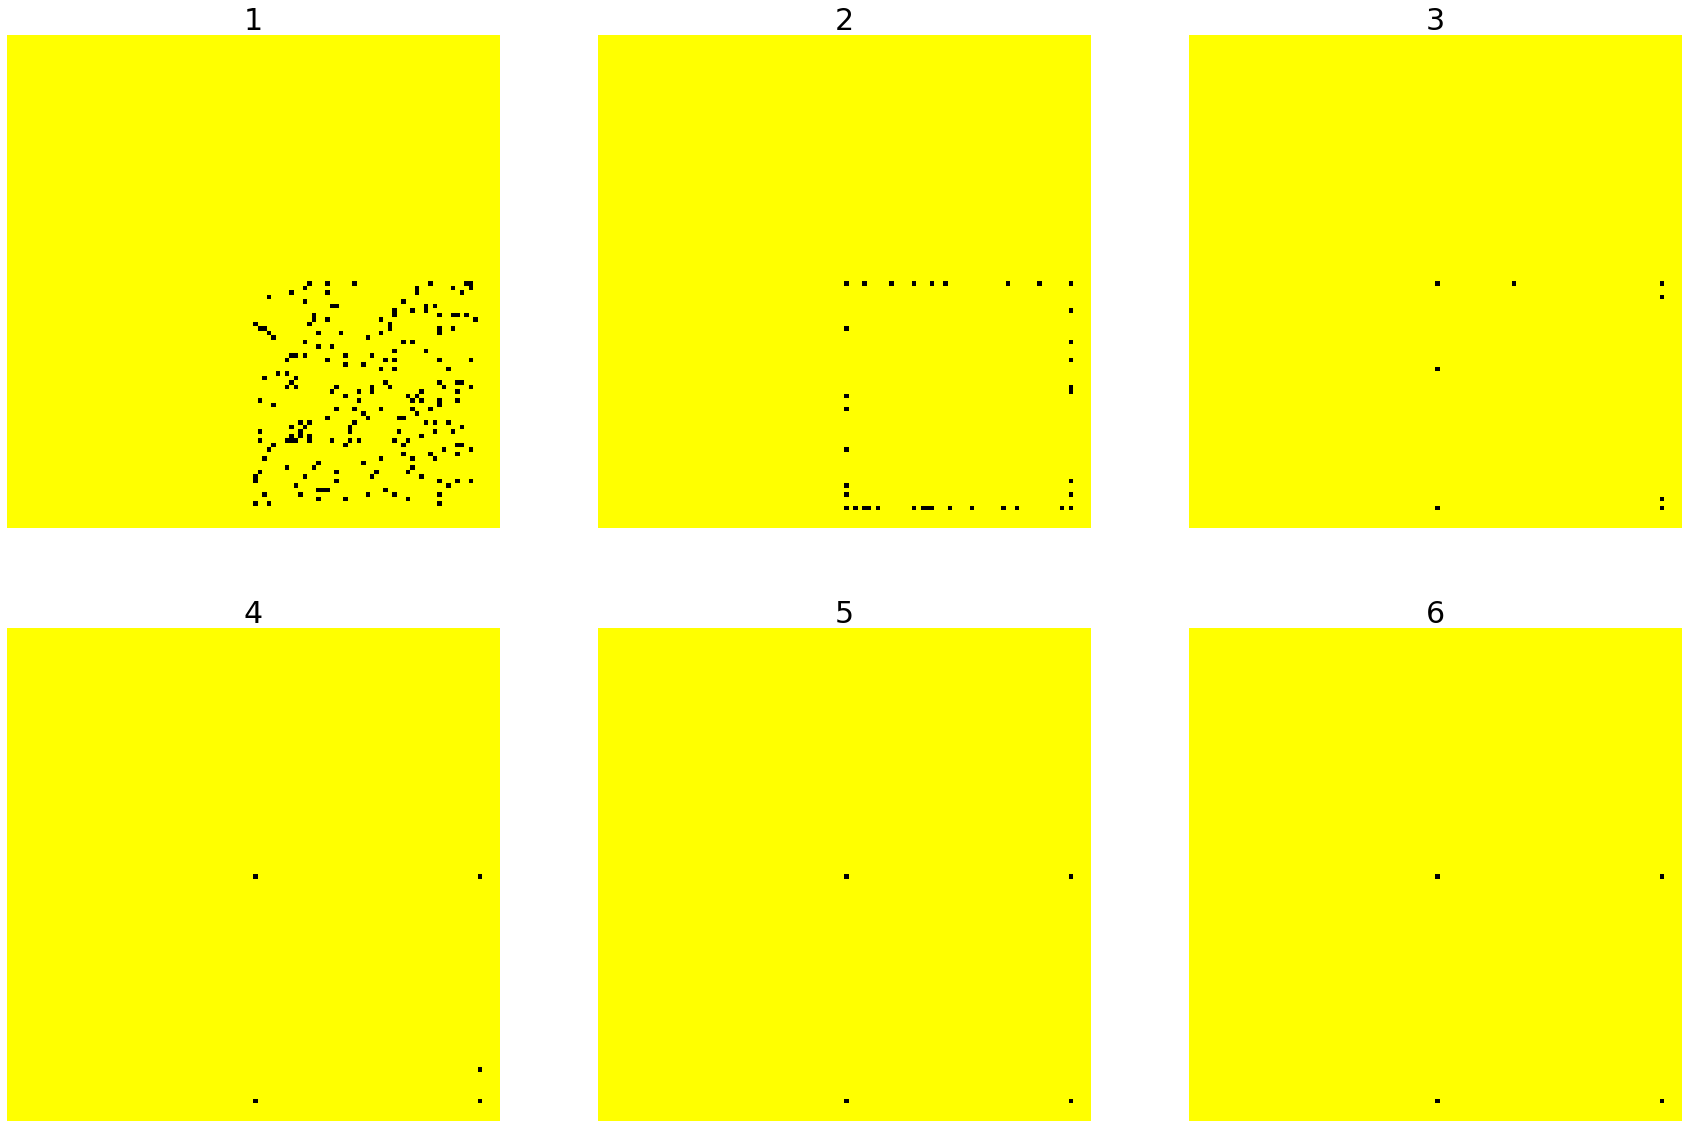

In [33]:
history = []
f, sub = plt.subplots(2, 3)
f.set_size_inches(30, 20)

for _ in range(100): #Generations
    if _%2 == 0 and _>0 and _<200:
        #print("i:", _, "value:", gbv)
        history.append(gbv)
    
    if _ < 6:
        A = display()
        sub[_//3, _%3].imshow(A,cmap='gnuplot'), sub[_//3, _%3].axis('off')
        sub[_//3, _%3].set_title(str(_+1) ,fontsize=30)
    
    
    for i in range(n):
        Move(ps[i])
        if (func(ps[i].cor) < ps[i].best):
            ps[i].best = func(ps[i].cor)
            ps[i].bestCor = ps[i].cor
        
        
    for i in range(n):
        updateBest(ps[i])

In [34]:
print(gbv)
print(gbcor)
#print(history)

-16.18925790758558
[10.          9.73809151]


In [22]:
history

[-15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.140223856952055,
 -15.14022

In [93]:
A = display()

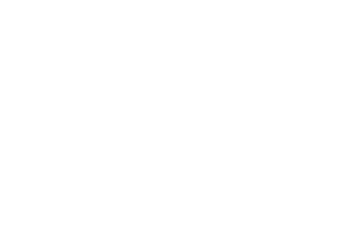

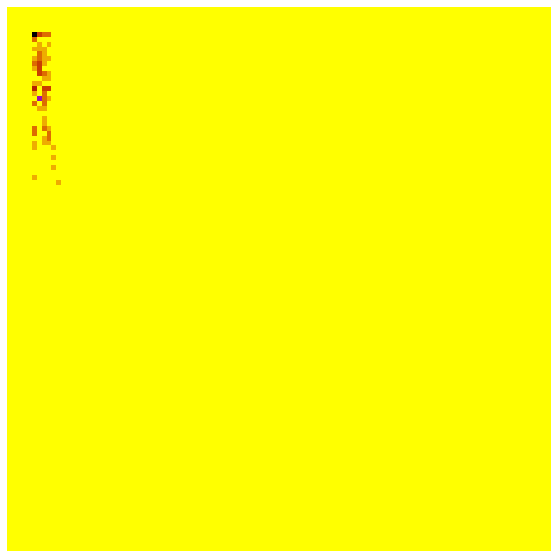

In [98]:
plt.axis('off')
plt.figure(figsize=(10,10))
plt.axis('off')

plt.imshow(A, cmap='gnuplot')

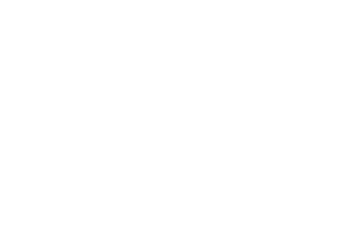

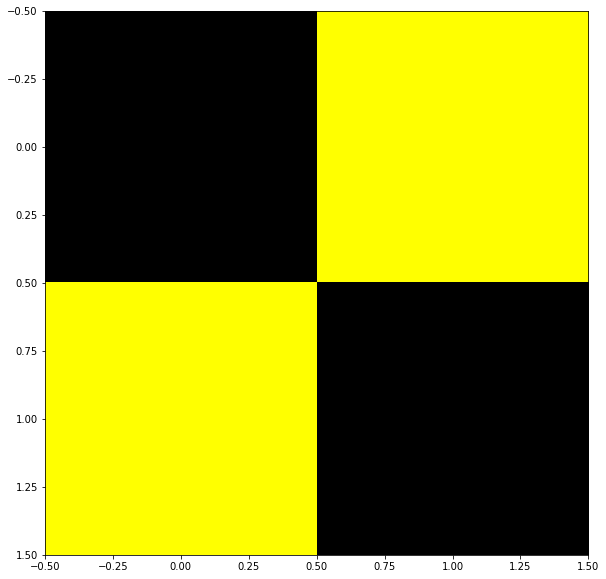

In [63]:
B = [[0, 100],[100, 0]]
plt.axis('off')
plt.figure(figsize=(10,10))


plt.imshow(B, cmap='gnuplot')